# Rainfall Weather Forecasting
### Project Description
##### Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
##### 1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


##### Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

##### Dataset Link-  
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
•	https://github.com/dsrscientist/dataset3


# Importing necessary libraries¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
df = pd.read_csv("C:\\Users\\suven\\OneDrive\\Desktop\\Internship\\Evaluation Projects\\Third Phase\\Rainfall weather forecasting\\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,6/25/2017,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [4]:
# checking rows and columns in dataset
df.shape

(8425, 23)

- There are 8425 rows and 23 columns in the dataset
- Out of these columns; 1 is target variable and rest 22 columns are features

In [5]:
# seeing all the columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

- for classification predictive model; 'RainTomorrow' is target variable and rest all are features
- for regression predictive model; 'Rainfall'is target variable and rest all are features

In [6]:
# Checking the datatypes of each column
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

- There are 7 non-numeric ; object type data fields. These will be transformed to numeric data type later.
- There are 16 numeric; float64 type data fields
- The column header match the datatypes in the columns

In [7]:
# seeing more info about dataset at a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

- There are some missing/null values in the dataset. We will check them and treat them.
- There are 23 columns and 6762 rows in dataset.
- There are 7 non-numeric ; object type data fields. These will be transformed to numeric data type later.
- There are 16 numeric; float64 type data fields

In [8]:
# checking null/missing values
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

- Except Date and Location, rest all the columns have missing/null values. 
- These will be treated later. The numerical columns will be imputed with the column's mean or median (depending on skewness) and the non-numeric fields will be imputed with the mode of the column.


In [9]:
# Checking skewness
df.skew()

MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
dtype: float64

- All the fields have mild skewness but Rainfall and Evaporation are heavily positively skewed.

In [10]:
# Checking statistical summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


- MinTemp is lightly negatively skewed as mean is slightly greater than median.
- MaxTemp is lightly positively skewed as mean is slightly greater than median.
- Rainfall is positively skewed as mean is greater than median. There seems to be presence of outliers.
- Evaporation is positively skewed as mean is greater than median. There seems to be presence of outliers.
- Sunshine is  negatively skewed as mean is lesser than median.
- WindGustSpeed is lightly positively skewed as mean is slightly greater than median.
- WindSpeed9am is lightly positively skewed as mean is slightly greater than median.
- WindSpeed3pm is lightly negatively skewed as mean is slightly greater than median.
- Humidity9am is lightly negatively skewed as mean is slightly greater than median.
- Humidity3pm is lightly positively skewed as mean is slightly greater than median.
- Pressure9am is lightly negatively skewed as mean is slightly greater than median.
- Pressure3pm is lightly negatively skewed as mean is slightly greater than median.
- Cloud9am is lightly negatively skewed as mean is slightly greater than median.
- Cloud3pm is lightly negatively skewed as mean is slightly greater than median.
- Temp9am is lightly negatively skewed as mean is slightly greater than median.
- Temp3pm is lightly positively skewed as mean is slightly greater than median.
- the skewness will be treated and outliers will be checked.


# Data Visualisation

Distribution Plot for  Date
Distribution Plot for  Location
Distribution Plot for  MinTemp


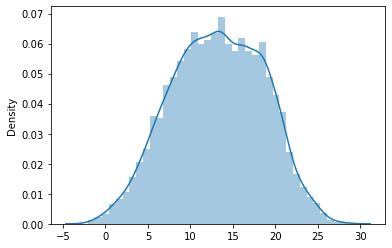

Distribution Plot for  MaxTemp


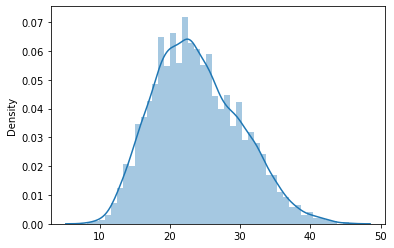

Distribution Plot for  Rainfall


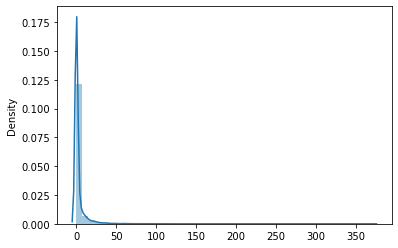

Distribution Plot for  Evaporation


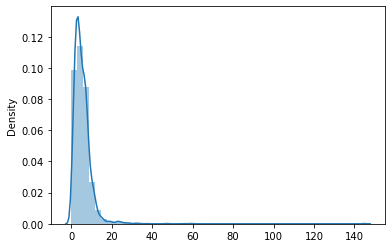

Distribution Plot for  Sunshine


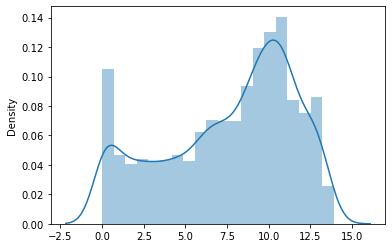

Distribution Plot for  WindGustDir
Distribution Plot for  WindGustSpeed


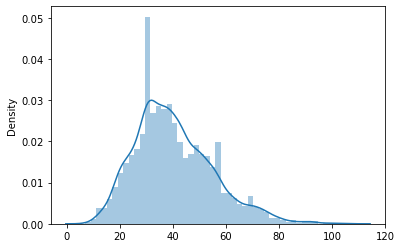

Distribution Plot for  WindDir9am
Distribution Plot for  WindDir3pm
Distribution Plot for  WindSpeed9am


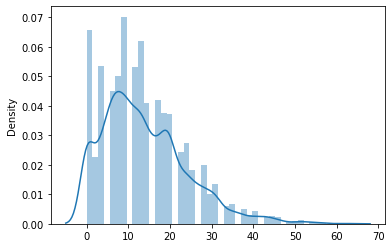

Distribution Plot for  WindSpeed3pm


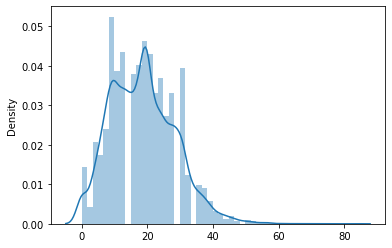

Distribution Plot for  Humidity9am


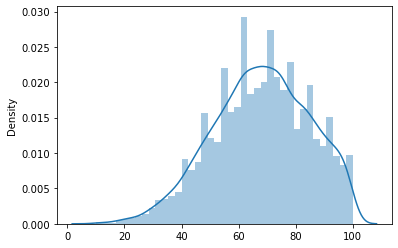

Distribution Plot for  Humidity3pm


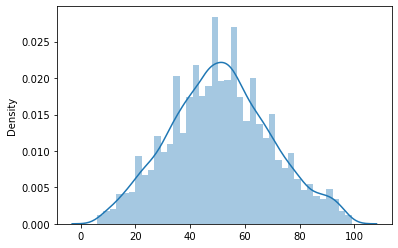

Distribution Plot for  Pressure9am


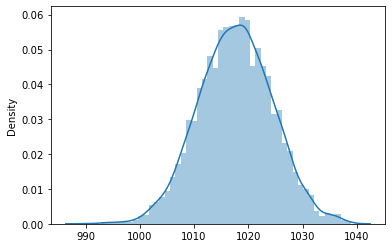

Distribution Plot for  Pressure3pm


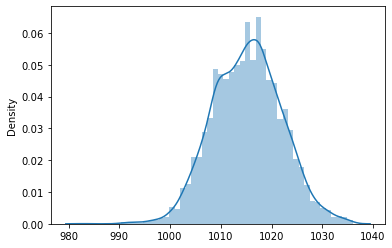

Distribution Plot for  Cloud9am


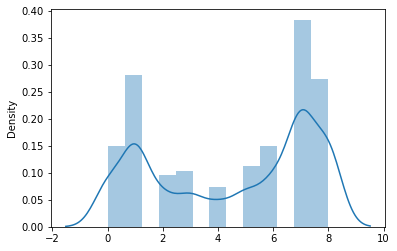

Distribution Plot for  Cloud3pm


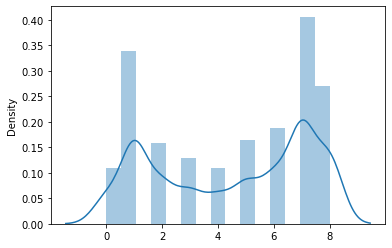

Distribution Plot for  Temp9am


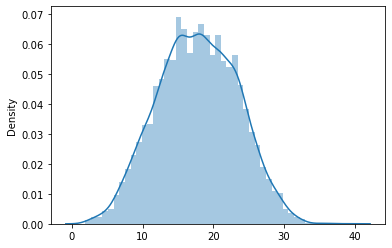

Distribution Plot for  Temp3pm


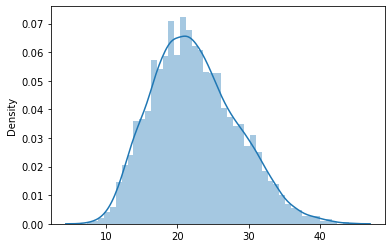

Distribution Plot for  RainToday
Distribution Plot for  RainTomorrow


In [11]:
# Let's visualise numerical fields on the distplot

for i in df.columns:
    print('Distribution Plot for ', i)
    if df[i].dtypes!='object':
        sns.distplot(x=df[i],kde=True)
        plt.show()

- MinTemp looks like a perfect Gaussian curve . Majority of the values are in the range of 10 to 20.
- Max Temp curve also looks like a perfect normal curve . Most of the values lie in the range of 20 to 30.
- Rainfall is positively skewed.
- Evaporation - Majority of the values lies near to zero. Which seems like there is skewness in the data.
- WindSpeed9am and 3pm show the same trend. We will concatenate these two and create an Average of the two column.
- Both Humidity 9am and 3pm has the same trend. We will concatenate these two and create an Average of the two column.
- Both Pressure 9am and 3pm has the same trend.We will concatenate these two and create an Average of the two column.
- Both Cloud 9am and 3pm has the same trend. We will concatenate these two and create an Average of the two column.
- Both Temp 9am and 3pm has the same trend. We will concatenate these two and create an Average of the two column.

In [12]:
df['Avg_WindSpeed']=(df['WindSpeed9am']+df['WindSpeed3pm'])/2

df['Avg_Humidity']=(df['Humidity9am']+df['Humidity3pm'])/2

df['Avg_Cloud']=(df['Cloud9am']+df['Cloud3pm'])/2

df['Avg_Temp'] = (df['Temp9am']+df['Temp3pm'])/2

df['Avg_Pressure']=(df['Pressure9am']+df['Pressure3pm'])/2


In [13]:
# Since Averages have been created therefore now we can remove the columns that were concatenated to create Avg columns
# Also, removing as it will not contribute to model building
df = df.drop(columns = ['Date', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm'], axis=1)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,No,No,22.0,46.5,NaN,19.35,1007.40
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,No,No,13.0,34.5,NaN,20.75,1009.20
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,No,No,22.5,34.0,NaN,22.10,1008.15
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,No,No,10.0,30.5,NaN,22.30,1015.20
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,No,No,13.5,57.5,7.5,23.75,1008.40


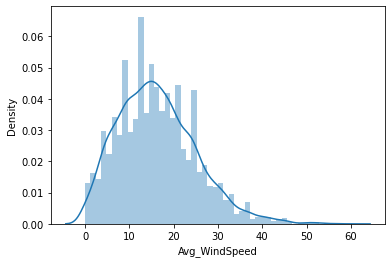

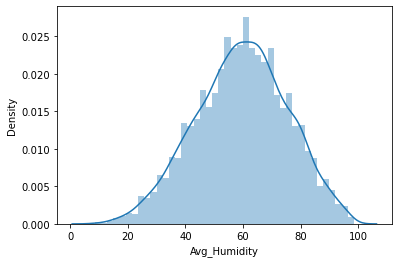

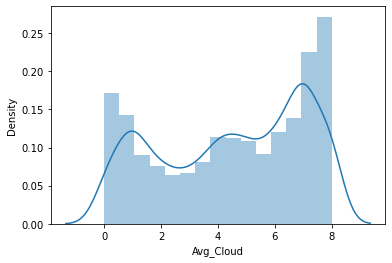

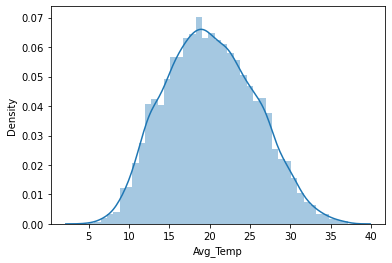

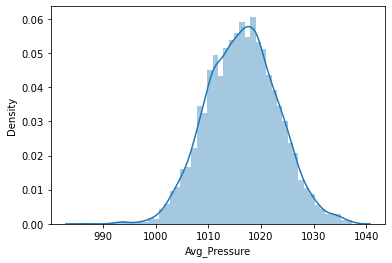

In [14]:
avg_columns = ['Avg_WindSpeed', 'Avg_Humidity', 'Avg_Cloud', 'Avg_Temp', 'Avg_Pressure']

for column in avg_columns:
    plt.figure()
    sns.distplot(df[column])

Count Plot for  Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
Melbourne       0.192522
Williamtown     0.145994
PerthAirport    0.142908
Albury          0.107656
Newcastle       0.097567
CoffsHarbour    0.072522
Brisbane        0.068724
Penrith         0.057211
Wollongong      0.056261
Darwin          0.029674
Adelaide        0.024332
Uluru           0.004629
Name: Location, dtype: float64


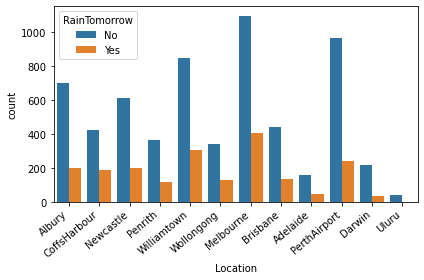

Count Plot for  MinTemp
Count Plot for  MaxTemp
Count Plot for  Rainfall
Count Plot for  Evaporation
Count Plot for  Sunshine
Count Plot for  WindGustDir
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64
N      0.095911
SSE    0.077751
S      0.077616
SW     0.076944
E      0.074926
WNW    0.071429
W      0.068200
WSW    0.067797
SE     0.065106
ENE    0.055825
SSW    0.053269
NW     0.051520
NE     0.047485
NNE    0.046139
ESE    0.040624
NNW    0.029459
Name: WindGustDir, dtype: float64


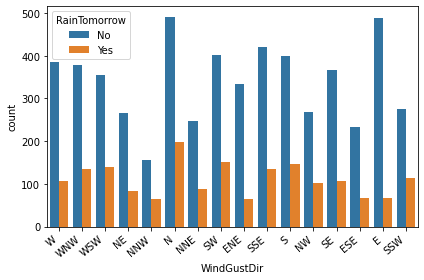

Count Plot for  WindGustSpeed
Count Plot for  WindDir9am
N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64
N      0.119273
SW     0.092680
NW     0.082280
WSW    0.071485
SE     0.066482
WNW    0.063191
SSW    0.061480
ENE    0.057004
NNE    0.056609
W      0.054502
NE     0.053844
S      0.052923
E      0.050026
SSE    0.048052
NNW    0.036862
ESE    0.033307
Name: WindDir9am, dtype: float64


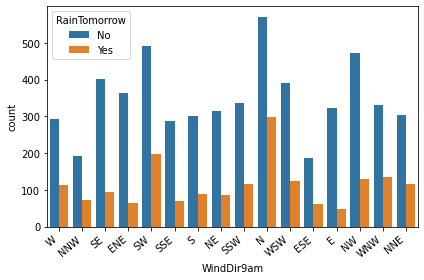

Count Plot for  WindDir3pm
SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64
SE     0.100160
S      0.091413
SSE    0.076752
WSW    0.071455
NE     0.067020
N      0.064556
SW     0.060860
WNW    0.059998
NW     0.057657
W      0.056918
ESE    0.056918
E      0.056671
ENE    0.051374
SSW    0.045583
NNE    0.044967
NNW    0.037699
Name: WindDir3pm, dtype: float64


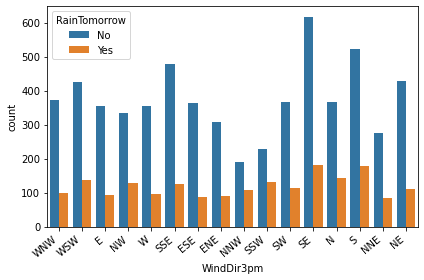

Count Plot for  RainToday
No     6195
Yes    1990
Name: RainToday, dtype: int64
No     0.756872
Yes    0.243128
Name: RainToday, dtype: float64


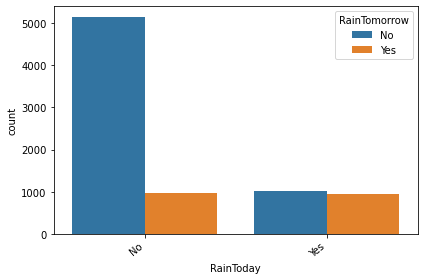

Count Plot for  RainTomorrow
No     6195
Yes    1991
Name: RainTomorrow, dtype: int64
No     0.75678
Yes    0.24322
Name: RainTomorrow, dtype: float64


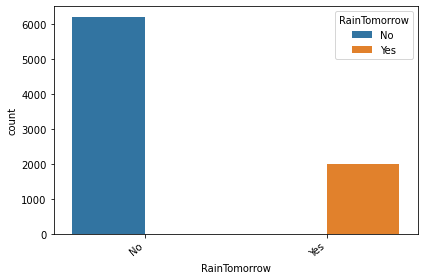

Count Plot for  Avg_WindSpeed
Count Plot for  Avg_Humidity
Count Plot for  Avg_Cloud
Count Plot for  Avg_Temp
Count Plot for  Avg_Pressure


In [15]:
# Next let's check the variables with the target (classification) variable 'Raintomorrow'
for i in df.columns:
    print('Count Plot for ', i)
    if df[i].dtypes=='object':
        ax = sns.countplot(x=df[i], hue = df['RainTomorrow'])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()
        print(df[i].value_counts())
        print(df[i].value_counts(normalize=True))
        plt.show()

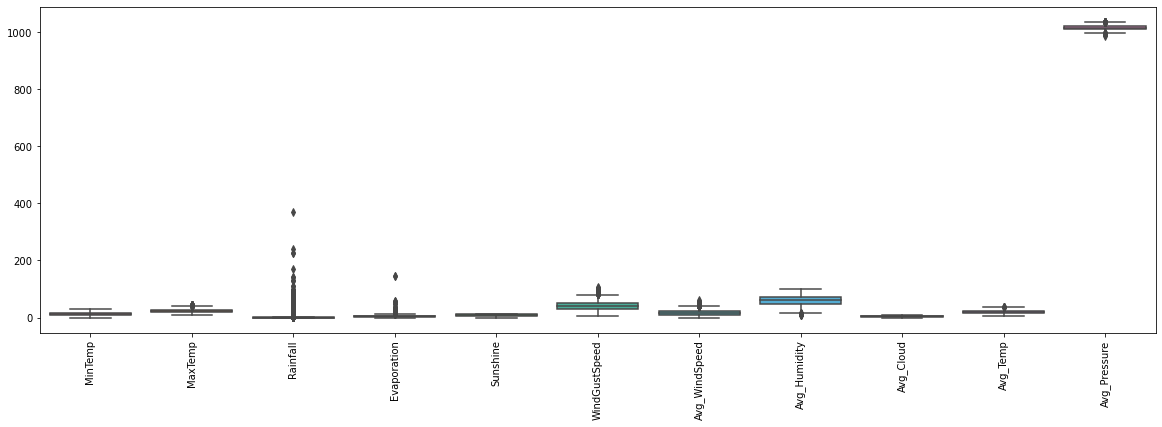

In [16]:
# Check outliers using boxplot
# Checking for outliers
plt.figure(figsize=(20,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

- Some features have outliers

# Imputing and Encoding 

In [17]:
# Imputing categorical columns with their mode value

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])
           

In [18]:
df.skew()

MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
Avg_WindSpeed     0.635448
Avg_Humidity     -0.146745
Avg_Cloud        -0.294976
Avg_Temp          0.164084
Avg_Pressure      0.005712
dtype: float64

In [19]:
df.isna().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
RainToday           0
RainTomorrow        0
Avg_WindSpeed     150
Avg_Humidity      130
Avg_Cloud        2840
Avg_Temp          123
Avg_Pressure     1316
dtype: int64

In [ ]:
# Imputing continuous columns with their mean/median value

In [20]:
# Imputing MinTemp and MaxTemp with their mean value
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Avg_Humidity'] = df['Avg_Humidity'].fillna(df['Avg_Humidity'].mean())
df['Avg_Cloud'] = df['Avg_Cloud'].fillna(df['Avg_Cloud'].mean())
df['Avg_Temp'] = df['Avg_Temp'].fillna(df['Avg_Temp'].mean())
df['Avg_Pressure'] = df['Avg_Pressure'].fillna(df['Avg_Pressure'].mean())

# Imputing Rainfall, Evaporation with their median as they show some skewness
# Mean gets affected by skewness while median doesnt

df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['Avg_WindSpeed'] = df['Avg_WindSpeed'].fillna(df['Avg_WindSpeed'].mean())

In [21]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
Avg_WindSpeed    0
Avg_Humidity     0
Avg_Cloud        0
Avg_Temp         0
Avg_Pressure     0
dtype: int64

- No column has missing/null values now

In [22]:
# Next Encoding categorical columns to change their data type to numeric

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])


In [23]:
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
RainToday          int32
RainTomorrow       int32
Avg_WindSpeed    float64
Avg_Humidity     float64
Avg_Cloud        float64
Avg_Temp         float64
Avg_Pressure     float64
dtype: object

- All categorical columns have been changed to numeric datatype

<AxesSubplot:>

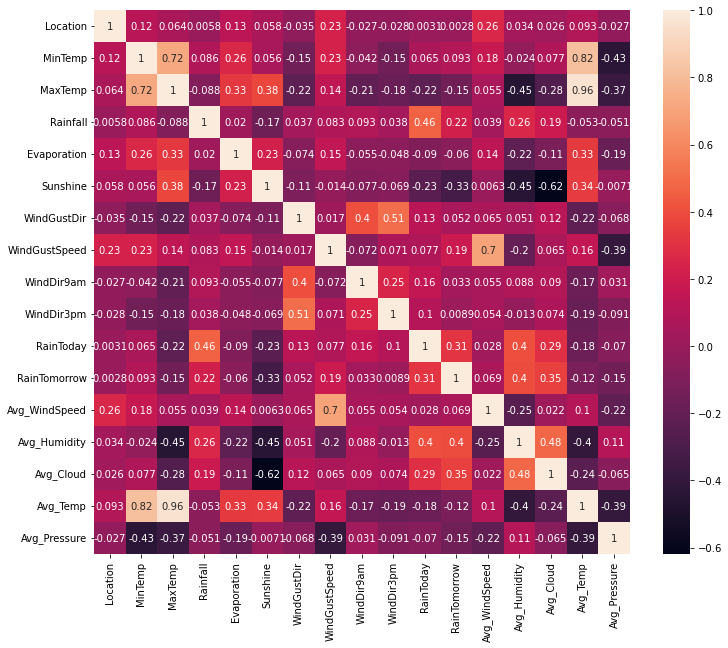

In [24]:
# Now lets plot heatmap to check correlation

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)


#### Multicollinearity
The highest value for correlation matrix is 0.96 between Avg_Temp and Max_Temp, which shows a strong correlation between the two columns. Apart from that there is no such column with high correlation value. We will also check for multicollinearity using VIF.

## Treating outliers

In [25]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z.shape

(8425, 17)

In [26]:
#setting threshold as 3
print(np.where (z>3)) # these are all the outliers

(array([  12,   44,   52,   60,   61,   62,   62,   62,   68,  123,  267,
        381,  407,  431,  462,  563,  568,  602,  683,  699,  713,  748,
        770,  796,  797,  802,  928,  935,  949,  979,  980,  980,  980,
       1008, 1009, 1011, 1138, 1148, 1149, 1151, 1202, 1203, 1237, 1241,
       1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481, 1513, 1661,
       1673, 1680, 1774, 1819, 1873, 1898, 1903, 2063, 2108, 2116, 2201,
       2219, 2231, 2265, 2429, 2488, 2500, 2505, 2527, 2541, 2593, 2676,
       2677, 2735, 2827, 2835, 2849, 2849, 2855, 2863, 2869, 2877, 2883,
       2890, 2891, 2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925,
       2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989, 3003, 3042, 3051,
       3059, 3066, 3067, 3067, 3068, 3070, 3082, 3082, 3089, 3089, 3099,
       3099, 3101, 3150, 3153, 3157, 3164, 3172, 3178, 3185, 3206, 3212,
       3213, 3221, 3227, 3234, 3248, 3248, 3260, 3278, 3291, 3302, 3303,
       3350, 3360, 3419, 3421, 3430, 3449, 3449, 3

In [27]:
# Removing the outlier 
df=df[(z<3).all(axis=1)]
print("shape of new dataset excluding outliers is: ",df.shape)

shape of new dataset excluding outliers is:  (8064, 17)


In [28]:
# data loss percentage for class problem

loss_percentage_class= ((8425- 8064)/8425)*100
loss_percentage_class

4.28486646884273

- The data loss is acceptable

In [29]:
# Now let's check skewness
df.skew()

Location        -0.040809
MinTemp         -0.083008
MaxTemp          0.331997
Rainfall         3.535592
Evaporation      1.282857
Sunshine        -0.721331
WindGustDir      0.121628
WindGustSpeed    0.507816
WindDir9am       0.169365
WindDir3pm      -0.124306
RainToday        1.306659
RainTomorrow     1.292357
Avg_WindSpeed    0.422257
Avg_Humidity    -0.154751
Avg_Cloud       -0.358738
Avg_Temp         0.136958
Avg_Pressure     0.063209
dtype: float64

- skewnes has reduced considerably after removing outliers. We well treat skewness furthermore.

In [30]:
# Checking multicollinearity
#importing the VIF in jupyter
from statsmodels.stats.outliers_influence import variance_inflation_factor
new_df=pd.DataFrame(df)
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = new_df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
    return VIF_Scores
df = new_df
vif_scores(df)

,Independent Features,VIF Scores
0,Location,4.949014
1,MinTemp,45.733409
2,MaxTemp,269.090804
3,Rainfall,2.283617
4,Evaporation,8.069044
5,Sunshine,16.602640
6,WindGustDir,5.197386
7,WindGustSpeed,22.809539
8,WindDir9am,4.610306
9,WindDir3pm,5.753190


# Part 1: Classification model for predicting 'RainTomorrow'

In [31]:
# Splitting data into target and feature variables
x = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

print("shape of x is: ",x.shape)
print("shape of y is: ",y.shape)

shape of x is:  (8064, 16)
shape of y is:  (8064,)


In [32]:
# Removing skewness using power transform method

from sklearn.preprocessing import power_transform
X = power_transform(x, method = 'yeo-johnson')
X

array([[-1.56907068,  0.05804485, -0.07742182, ..., -0.02872765,
        -0.09254839, -1.55616169],
       [-1.56907068, -1.05933279,  0.28355632, ..., -0.02872765,
         0.16090405, -1.24537284],
       [-1.56907068, -0.0346254 ,  0.3787991 , ..., -0.02872765,
         0.40102774, -1.42644486],
       ...,
       [ 1.0167344 , -1.43511405,  0.56548827, ..., -0.02872765,
        -0.10168855,  0.39852523],
       [ 1.0167344 , -0.9844179 ,  0.58082561, ..., -0.99505289,
         0.12498149,  0.23979415],
       [ 1.0167344 ,  0.33565971,  0.08245246, ...,  1.82564992,
        -0.35091384,  0.42354358]])

In [33]:
#checking for skewness is removed or not
skew_df=pd.DataFrame(X)
skew_df.skew()

0    -0.183843
1    -0.103599
2    -0.013560
3     1.046315
4     0.059934
5    -0.064872
6    -0.186735
7     0.002406
8    -0.156937
9    -0.248650
10    1.306659
11   -0.056354
12   -0.045731
13   -0.158175
14   -0.032610
15   -0.000997
dtype: float64

- skewness has reduced considerably

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.146736,Location
1,6.601815,MinTemp
2,16.296861,MaxTemp
3,1.977599,Rainfall
4,1.523365,Evaporation
5,1.931547,Sunshine
6,1.567220,WindGustDir
7,2.293584,WindGustSpeed
8,1.313067,WindDir9am
9,1.402785,WindDir3pm


In [36]:
# Dropping column Avg_Temp 
X = X.drop(["Avg_Temp"],axis=1)

In [37]:
# checking if multicollinearity has reduced after removing Avg_Temp column
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.135026,Location
1,3.693225,MinTemp
2,4.648502,MaxTemp
3,1.975864,Rainfall
4,1.522967,Evaporation
5,1.926351,Sunshine
6,1.566082,WindGustDir
7,2.252207,WindGustSpeed
8,1.313058,WindDir9am
9,1.401490,WindDir3pm


- Multicollinearity issue is resolved now!

In [38]:
# Checking target variable class imbalance
y.value_counts()

0    6220
1    1844
Name: RainTomorrow, dtype: int64

In [39]:
#Balancing the data using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(X,y)
Y.value_counts()

0    6220
1    6220
Name: RainTomorrow, dtype: int64

- Now the target variable looks balanced!

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
lg = LogisticRegression()

In [42]:
#Finding the random state

maxaccu=0
maxrs=0
for i in range(1,100):
    print("At Random State ", i)
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.20, random_state=i)
    lg.fit(Xtrain,Ytrain)
    predlg=lg.predict(Xtest)
    trainlg=lg.predict(Xtrain)
    acc=accuracy_score(Ytest,predlg)
    accu=accuracy_score(Ytrain,trainlg)
    print('testing accuracy', acc, 'randon state',i)
    print('Training Accuracy', accu, 'random state', i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('max accuracy', maxaccu , 'max_random_state', i)

At Random State  1
testing accuracy 0.7753215434083601 randon state 1
Training Accuracy 0.7595458199356914 random state 1
max accuracy 0.7753215434083601 max_random_state 1
At Random State  2
testing accuracy 0.7721061093247589 randon state 2
Training Accuracy 0.761354501607717 random state 2
At Random State  3
testing accuracy 0.764871382636656 randon state 3
Training Accuracy 0.7610530546623794 random state 3
At Random State  4
testing accuracy 0.7652733118971061 randon state 4
Training Accuracy 0.7615554662379421 random state 4
At Random State  5
testing accuracy 0.7604501607717041 randon state 5
Training Accuracy 0.7626607717041801 random state 5
At Random State  6
testing accuracy 0.7580385852090032 randon state 6
Training Accuracy 0.7647709003215434 random state 6
At Random State  7
testing accuracy 0.7688906752411575 randon state 7
Training Accuracy 0.7614549839228296 random state 7
At Random State  8
testing accuracy 0.7596463022508039 randon state 8
Training Accuracy 0.7634646

In [43]:
# Checking for the Max. Accuracy at Random State
print('max accuracy', maxaccu , 'max_random_state', i)

max accuracy 0.7809485530546624 max_random_state 99


Using random state = 99 for the test train data split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 99)

In [45]:
print("Shape of X_train is :", X_train.shape)
print("Shape of X_test is :", X_test.shape)
print("Shape of Y_train is :", Y_train.shape)
print("Shape of Y_test is :", Y_test.shape)

Shape of X_train is : (9952, 15)
Shape of X_test is : (2488, 15)
Shape of Y_train is : (9952,)
Shape of Y_test is : (2488,)


# 1) Logistic Regression

In [46]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)
Y_pred_train_lg = lg.predict(X_train)
Y_pred_test_lg = lg.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_lg))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_lg))
print(confusion_matrix(Y_test, Y_pred_test_lg))
print(classification_report(Y_test, Y_pred_test_lg))

Training accuracy is:  0.7629622186495176
Testing accuracy is:  0.762459807073955
[[994 282]
 [309 903]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1276
           1       0.76      0.75      0.75      1212

    accuracy                           0.76      2488
   macro avg       0.76      0.76      0.76      2488
weighted avg       0.76      0.76      0.76      2488



In [47]:
#AUC ROC Curve
# Importing libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

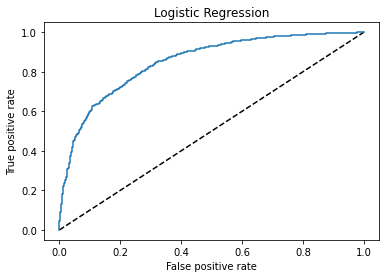

0.7620231850771284

In [48]:
#AUC ROC curve for Logistic regression
Y_pred_prob=lg.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Linear Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(Y_test,lg.predict(X_test))

auc_score

# 2) Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
Y_pred_train_dtc = dtc.predict(X_train)
Y_pred_test_dtc = dtc.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_dtc))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_dtc))
print(confusion_matrix(Y_test, Y_pred_test_dtc))
print(classification_report(Y_test, Y_pred_test_dtc))

Training accuracy is:  0.9997990353697749
Testing accuracy is:  0.875
[[1100  176]
 [ 135 1077]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1276
           1       0.86      0.89      0.87      1212

    accuracy                           0.88      2488
   macro avg       0.88      0.88      0.87      2488
weighted avg       0.88      0.88      0.88      2488



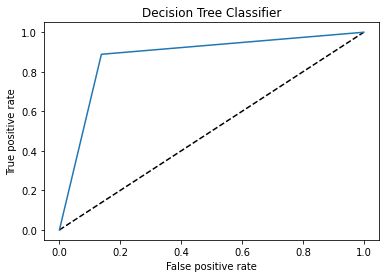

0.8753414134516899

In [50]:
#AUC ROC curve for Decision Tree Classifier
Y_pred_prob=dtc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,dtc.predict(X_test))

auc_score

# 3) Random Forest Classifier

In [51]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred_train_rf = rf.predict(X_train)
Y_pred_test_rf = rf.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_rf))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_rf))
print(confusion_matrix(Y_test, Y_pred_test_rf))
print(classification_report(Y_test, Y_pred_test_rf))

Training accuracy is:  0.9997990353697749
Testing accuracy is:  0.9312700964630225
[[1186   90]
 [  81 1131]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1276
           1       0.93      0.93      0.93      1212

    accuracy                           0.93      2488
   macro avg       0.93      0.93      0.93      2488
weighted avg       0.93      0.93      0.93      2488



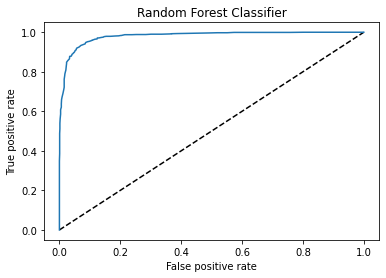

0.9313177007355908

In [52]:
#AUC ROC curve for Random Forest Classifier Classifier
Y_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(Y_test,rf.predict(X_test))

auc_score

# 4) KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred_train_knn = knn.predict(X_train)
Y_pred_test_knn = knn.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_knn))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_knn))
print(confusion_matrix(Y_test, Y_pred_test_knn))
print(classification_report(Y_test, Y_pred_test_knn))

Training accuracy is:  0.9042403536977492
Testing accuracy is:  0.8585209003215434
[[ 968  308]
 [  44 1168]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1276
           1       0.79      0.96      0.87      1212

    accuracy                           0.86      2488
   macro avg       0.87      0.86      0.86      2488
weighted avg       0.88      0.86      0.86      2488



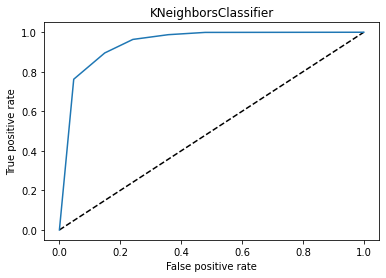

0.8611585296460681

In [54]:
#AUC ROC curve for  KNeighborsClassifier
Y_pred_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,knn.predict(X_test))

auc_score

# 5) Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
Y_pred_train_gbc = gbc.predict(X_train)
Y_pred_test_gbc = gbc.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_gbc))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_gbc))
print(confusion_matrix(Y_test, Y_pred_test_gbc))
print(classification_report(Y_test, Y_pred_test_gbc))

Training accuracy is:  0.8533963022508039
Testing accuracy is:  0.8492765273311897
[[1096  180]
 [ 195 1017]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1276
           1       0.85      0.84      0.84      1212

    accuracy                           0.85      2488
   macro avg       0.85      0.85      0.85      2488
weighted avg       0.85      0.85      0.85      2488



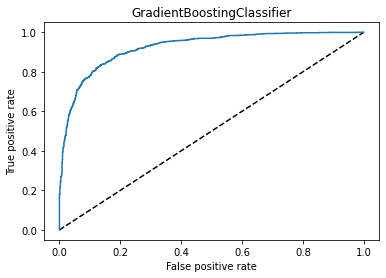

0.849021540085043

In [56]:
#AUC ROC curve for  GradientBoostingClassifier
Y_pred_prob=gbc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,gbc.predict(X_test))

auc_score

# 7) AdaBoosting Classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,Y_train)
Y_pred_train_ada = ada.predict(X_train)
Y_pred_test_ada = ada.predict(X_test)
print("Training accuracy is: ", accuracy_score(Y_train, Y_pred_train_ada))
print("Testing accuracy is: ", accuracy_score(Y_test, Y_pred_test_ada))
print(confusion_matrix(Y_test, Y_pred_test_ada))
print(classification_report(Y_test, Y_pred_test_ada))

Training accuracy is:  0.8041599678456591
Testing accuracy is:  0.8066720257234726
[[1016  260]
 [ 221  991]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1276
           1       0.79      0.82      0.80      1212

    accuracy                           0.81      2488
   macro avg       0.81      0.81      0.81      2488
weighted avg       0.81      0.81      0.81      2488



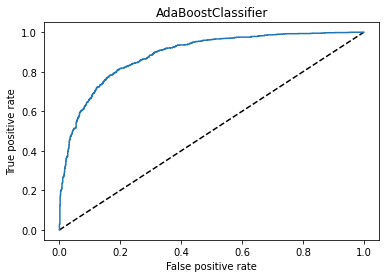

0.806947505095337

In [58]:
#AUC ROC curve for  AdaBoostClassifier
Y_pred_prob=ada.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,Y_pred_prob,pos_label=1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()

auc_score=roc_auc_score(Y_test,ada.predict(X_test))

auc_score

# Cross-validation

In [59]:
from sklearn.model_selection import cross_val_score

# validation accuracy

model=[lg,dtc,rf, knn,gbc,ada]

for i in model:
    for j in range(2,10):
        print('taking cv =', j)
        cr_score=cross_val_score(i, X, Y, cv=j)
        print('Cross validation score for ' , i ,' is', cr_score)
        print('Mean of Cross Val. score is ', cr_score.mean())

taking cv = 2
Cross validation score for  LogisticRegression()  is [0.7022508  0.73745981]
Mean of Cross Val. score is  0.719855305466238
taking cv = 3
Cross validation score for  LogisticRegression()  is [0.68796721 0.61345551 0.79811867]
Mean of Cross Val. score is  0.699847127937352
taking cv = 4
Cross validation score for  LogisticRegression()  is [0.68874598 0.64758842 0.68038585 0.82025723]
Mean of Cross Val. score is  0.7092443729903537
taking cv = 5
Cross validation score for  LogisticRegression()  is [0.67885852 0.71262058 0.64107717 0.7307074  0.82315113]
Mean of Cross Val. score is  0.7172829581993568
taking cv = 6
Cross validation score for  LogisticRegression()  is [0.66393443 0.69431051 0.60877955 0.67679691 0.77665219 0.81765557]
Mean of Cross Val. score is  0.7063548605131597
taking cv = 7
Cross validation score for  LogisticRegression()  is [0.70359955 0.66291503 0.71918965 0.69105234 0.65953855 0.82892515
 0.81598199]
Mean of Cross Val. score is  0.7258860358911444
ta

### Observation Made from abovelassifier models:
- The Random Forest Classifier is giving the testing accuracy 93%  .

# Hyperparameter Tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV

#Creating parameter list to be passed in RandomizedSearchCV
parameters = {
 'max_features': ['auto', 'sqrt','log2']
    
} 

RCV=RandomizedSearchCV(estimator=RandomForestClassifier(),
                param_distributions=parameters,
                cv=9,
                scoring='accuracy')

In [75]:
RCV.fit(X_train,Y_train)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   scoring='accuracy')

In [76]:
RCV.best_params_

{'max_features': 'sqrt'}

In [77]:
# Checking score with best parameter
final_model=RandomForestClassifier(max_features='sqrt')
final_model.fit(X_train,Y_train)
predfinal=final_model.predict(X_test)
print('Final Accuracy is with Random Forest Classifier = ',accuracy_score(Y_test,predfinal))

Final Accuracy is with Random Forest Classifier =  0.932475884244373


<function matplotlib.pyplot.show(close=None, block=None)>

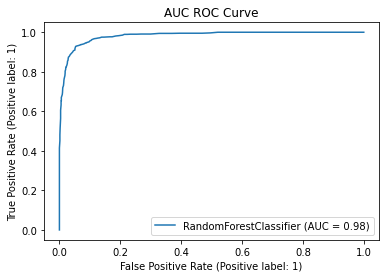

In [79]:
#AUC ROC of Best Estimator
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RCV.best_estimator_,X_test,Y_test)
plt.title('AUC ROC Curve')
plt.show

# Saving the model

In [81]:
import joblib
joblib.dump(RCV.best_estimator_, "Rainfall weather forecasting.pkl")

['Rainfall weather forecasting.pkl']

In [82]:
# Conclusion
a=np.array(Y_test)
predicted=np.array(predfinal)
df_con=pd.DataFrame({'Original':a,'Predicted':predicted}, index=range(len(a)))
df_con

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
2483,1,1
2484,0,0
2485,1,1
2486,0,0


# Part 2: Regression model for the Prediction of 'Rainfall'

In [89]:
X = df.drop(['Rainfall'], axis=1)
Y= df['Rainfall']
print(X.shape)
print(Y.shape)

(8064, 16)
(8064,)


In [90]:
#standardising features
sc= StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
X

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,-1.509770,0.053772,-0.150131,-0.093383,-0.014245,1.233582,0.352079,1.256877,1.400197,-0.541229,-0.544484,0.743379,-0.829609,0.013692,-0.129902,-1.542225
1,-1.509770,-1.060593,0.214020,-0.093383,-0.014245,1.446370,0.352079,-0.273201,1.626646,-0.541229,-0.544484,-0.343811,-1.597091,0.013692,0.125170,-1.239747
2,-1.509770,-0.039092,0.313334,-0.093383,-0.014245,1.659158,0.507491,1.256877,1.626646,-0.541229,-0.544484,0.803779,-1.629069,0.013692,0.371132,-1.416193
3,-1.509770,-0.726283,0.694038,-0.093383,-0.014245,-0.681506,-1.202039,0.382547,-1.770086,-0.541229,-0.544484,-0.706208,-1.852918,0.013692,0.407571,-0.231485
4,-1.509770,0.815254,1.405788,-0.093383,-0.014245,1.233582,0.118962,-1.366114,-0.184944,-0.541229,-0.544484,-0.283412,-0.126084,1.478888,0.671753,-1.374182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,1.029752,-1.914939,-0.067369,-0.093383,-0.014245,-1.532657,-0.658098,0.382547,-1.543638,-0.541229,-0.544484,-0.464610,-1.405220,0.013692,-0.694705,0.986830
8060,1.029752,-1.766357,0.247125,-0.093383,-0.014245,-0.255931,-1.357451,0.382547,-1.090740,-0.541229,-0.544484,-0.585409,-1.341263,0.013692,-0.430523,0.793580
8061,1.029752,-1.432047,0.511962,-0.093383,-0.014245,-0.894294,-0.191862,0.382547,1.400197,-0.541229,-0.544484,-0.827007,-1.341263,0.013692,-0.139012,0.390276
8062,1.029752,-0.986302,0.528515,-0.093383,-0.014245,0.382432,-0.891215,0.601129,-1.090740,-0.541229,-0.544484,-0.706208,-1.405220,-0.967778,0.088731,0.230634


In [91]:
# checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.151103,Location
1,6.607338,MinTemp
2,16.298686,MaxTemp
3,1.524109,Evaporation
4,1.950228,Sunshine
5,1.567567,WindGustDir
6,2.367116,WindGustSpeed
7,1.311378,WindDir9am
8,1.405620,WindDir3pm
9,1.301367,RainToday


In [92]:
# Dropping Avg_Temp as Avg_Temp and Max_Temp show multicollinearity

X = X.drop(["Avg_Temp"],axis=1)
X.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Pressure
0,-1.50977,0.053772,-0.150131,-0.093383,-0.014245,1.233582,0.352079,1.256877,1.400197,-0.541229,-0.544484,0.743379,-0.829609,0.013692,-1.542225
1,-1.50977,-1.060593,0.214020,-0.093383,-0.014245,1.446370,0.352079,-0.273201,1.626646,-0.541229,-0.544484,-0.343811,-1.597091,0.013692,-1.239747
2,-1.50977,-0.039092,0.313334,-0.093383,-0.014245,1.659158,0.507491,1.256877,1.626646,-0.541229,-0.544484,0.803779,-1.629069,0.013692,-1.416193
3,-1.50977,-0.726283,0.694038,-0.093383,-0.014245,-0.681506,-1.202039,0.382547,-1.770086,-0.541229,-0.544484,-0.706208,-1.852918,0.013692,-0.231485
4,-1.50977,0.815254,1.405788,-0.093383,-0.014245,1.233582,0.118962,-1.366114,-0.184944,-0.541229,-0.544484,-0.283412,-0.126084,1.478888,-1.374182


In [93]:
# Let's check if multicollinearity still exists
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.139003,Location
1,3.693766,MinTemp
2,4.647906,MaxTemp
3,1.523695,Evaporation
4,1.944297,Sunshine
5,1.566348,WindGustDir
6,2.322919,WindGustSpeed
7,1.311374,WindDir9am
8,1.404489,WindDir3pm
9,1.301109,RainToday


The issue of multicollinearity is solved now.

In [94]:
# Removing skewness
from sklearn.preprocessing import power_transform
X=power_transform(x, method='yeo-johnson')
X

array([[-1.56907068,  0.05804485, -0.07742182, ..., -0.02872765,
        -0.09254839, -1.55616169],
       [-1.56907068, -1.05933279,  0.28355632, ..., -0.02872765,
         0.16090405, -1.24537284],
       [-1.56907068, -0.0346254 ,  0.3787991 , ..., -0.02872765,
         0.40102774, -1.42644486],
       ...,
       [ 1.0167344 , -1.43511405,  0.56548827, ..., -0.02872765,
        -0.10168855,  0.39852523],
       [ 1.0167344 , -0.9844179 ,  0.58082561, ..., -0.99505289,
         0.12498149,  0.23979415],
       [ 1.0167344 ,  0.33565971,  0.08245246, ...,  1.82564992,
        -0.35091384,  0.42354358]])

In [95]:
#checking for skewness is removed or not
skew_df=pd.DataFrame(X)
skew_df.skew()

0    -0.183843
1    -0.103599
2    -0.013560
3     1.046315
4     0.059934
5    -0.064872
6    -0.186735
7     0.002406
8    -0.156937
9    -0.248650
10    1.306659
11   -0.056354
12   -0.045731
13   -0.158175
14   -0.032610
15   -0.000997
dtype: float64

skewness is treated now.It cant be reduced furthermore.

In [96]:
# Importing Linear Regression and metrics for it
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [97]:
# Finding the best Random State
maxr2=0
maxrs=0
lr=LinearRegression()
for i in range(0,200):
    print("Random State is ", i)
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=i)
    lr.fit(xtrain,ytrain)
    predtrain=lr.predict(xtrain)
    predtest=lr.predict(xtest)
    print('training accuracy is ', r2_score(ytrain,predtrain))
    score=r2_score(ytest,predtest)
    print('testing accuracy is ', score)
    print("\n")
    
    if score>maxr2:
        maxr2=score
        maxrs=i
        
        
print("maximum r2 score is ", maxr2 , "at random state ", maxrs)

Random State is  0
training accuracy is  0.5128621267775317
testing accuracy is  0.5137924546475532


Random State is  1
training accuracy is  0.5100853183058924
testing accuracy is  0.5268765881815447


Random State is  2
training accuracy is  0.5127900032346848
testing accuracy is  0.514430073460612


Random State is  3
training accuracy is  0.510891879879843
testing accuracy is  0.5231142788005474


Random State is  4
training accuracy is  0.5111859428205529
testing accuracy is  0.5197824054378369


Random State is  5
training accuracy is  0.5162942478140435
testing accuracy is  0.5018099390530284


Random State is  6
training accuracy is  0.51386127812142
testing accuracy is  0.5100734178335091


Random State is  7
training accuracy is  0.51288808782692
testing accuracy is  0.5135460530004121


Random State is  8
training accuracy is  0.5150227998945139
testing accuracy is  0.5066381025073916


Random State is  9
training accuracy is  0.5139337363531926
testing accuracy is  0.51062

We have got the best random state at 175

In [98]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=113)
print("shape of x_train is: ",x_train.shape)
print("shape of y_train is: ",y_train.shape)
print("shape of x_test is: ",x_test.shape)
print("shape of y_test is: ",y_test.shape)

shape of x_train is:  (6451, 16)
shape of y_train is:  (6451,)
shape of x_test is:  (1613, 16)
shape of y_test is:  (1613,)


# 1. Linear Regression

In [99]:
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print('training accuracy is ', r2_score(y_train,y_train_pred))
print('testing accuracy is ', r2_score(y_test,y_test_pred))
print("Mean Squared Error is ",mean_squared_error(y_test,y_test_pred))
print("Mean Absolute Error is ",mean_absolute_error(y_test,y_test_pred))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,y_test_pred)))

training accuracy is  0.509935623634567
testing accuracy is  0.5264061914104758
Mean Squared Error is  11.013093180826795
Mean Absolute Error is  1.5609503725255434
Root Mean Squared Error is  3.318598074613254


In [100]:
from sklearn.model_selection import cross_val_score
#cross validation of the lr model
for j in range(2,20):
    cv_score = cross_val_score(lr,x,y,cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())
    print('training accuracy is ', r2_score(y_train,y_train_pred))
    print('testing accuracy is ', r2_score(y_test,y_test_pred))

At fold  2 Mean CV score is  0.22355522522378235
training accuracy is  0.509935623634567
testing accuracy is  0.5264061914104758
At fold  3 Mean CV score is  0.23998544548283363
training accuracy is  0.509935623634567
testing accuracy is  0.5264061914104758
At fold  4 Mean CV score is  0.24530863058777388
training accuracy is  0.509935623634567
testing accuracy is  0.5264061914104758
At fold  5 Mean CV score is  0.251008125269013
training accuracy is  0.509935623634567
testing accuracy is  0.5264061914104758
At fold  6 Mean CV score is  0.2534436483690407
training accuracy is  0.509935623634567
testing accuracy is  0.5264061914104758
At fold  7 Mean CV score is  0.2521586883327355
training accuracy is  0.509935623634567
testing accuracy is  0.5264061914104758
At fold  8 Mean CV score is  0.2577501517556531
training accuracy is  0.509935623634567
testing accuracy is  0.5264061914104758
At fold  9 Mean CV score is  0.25737216257837175
training accuracy is  0.509935623634567
testing accur

# 2. Decision Tree Regressor

In [101]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_train_pred_dtr = dtr.predict(x_train)
y_test_pred_dtr = dtr.predict(x_test)
print('training accuracy is ', r2_score(y_train, y_train_pred_dtr))
print('testing accuracy is ', r2_score(y_test, y_test_pred_dtr))
print('Mean squared error is ', mean_squared_error(y_test,y_test_pred_dtr))
print('Mean Absolute error is ', mean_absolute_error(y_test,y_test_pred_dtr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,y_test_pred_dtr)))

training accuracy is  1.0
testing accuracy is  0.9999685410413724
Mean squared error is  0.0007315561066336046
Mean Absolute error is  0.0027278363298204253
Root Mean Squared Error is  0.027047293887441023


In [102]:
#Cross validation of the dtr model
dtr=DecisionTreeRegressor()
for j in range(2,10):
    cv_dtr=cross_val_score(dtr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_dtr.mean())

At fold  2 Mean CV score is  -0.6741453997605352
At fold  3 Mean CV score is  -0.5186998477747743
At fold  4 Mean CV score is  -0.5068946484812953
At fold  5 Mean CV score is  -0.24837782788890955
At fold  6 Mean CV score is  -0.2153550966485438
At fold  7 Mean CV score is  -0.10798770450578819
At fold  8 Mean CV score is  -0.06848523538431142
At fold  9 Mean CV score is  0.03565950997142301


# 3. RandomForestRegressor

In [103]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_train_pred_rfr = rfr.predict(x_train)
y_test_pred_rfr = rfr.predict(x_test)
print("training accuracy is ",r2_score(y_train,y_train_pred_rfr))
print("testing accuracy is ",r2_score(y_test,y_test_pred_rfr))
print("mean squared error is ",mean_squared_error(y_test, y_test_pred_rfr))
print("mean absolute error is ",mean_absolute_error(y_test, y_test_pred_rfr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,y_test_pred_rfr)))

training accuracy is  0.9999961309880316
testing accuracy is  0.9999786966863808
mean squared error is  0.0004953936763793985
mean absolute error is  0.0025232486050844345
Root Mean Squared Error is  0.022257440921619864


In [104]:
# cross validation for random forest model

for j in range(2,10):
    cv_rfr = cross_val_score(rfr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_rfr.mean())

At fold  2 Mean CV score is  0.22257686546449146
At fold  3 Mean CV score is  0.28252044295440143
At fold  4 Mean CV score is  0.24322405020334034
At fold  5 Mean CV score is  0.38229591605756735
At fold  6 Mean CV score is  0.3767620202404138
At fold  7 Mean CV score is  0.4192372772790403
At fold  8 Mean CV score is  0.45450302905109885
At fold  9 Mean CV score is  0.47313811593174815


# 4. ExtraTreesRegressor

In [105]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
y_train_pred_etr = etr.predict(x_train)
y_test_pred_etr = etr.predict(x_test)
print('training accuracy is ',r2_score(y_train, y_train_pred_etr))
print('testing accuracy is ',r2_score(y_test, y_test_pred_etr))
print('mean squared error is ',mean_squared_error(y_test, y_test_pred_etr))
print('mean absolute error is ',mean_absolute_error(y_test, y_test_pred_etr))
print('root mean squared error is ',np.sqrt(mean_squared_error(y_test, y_test_pred_etr)))

training accuracy is  1.0
testing accuracy is  0.999998314093079
mean squared error is  3.9204587724733924e-05
mean absolute error is  0.0007470551766906665
root mean squared error is  0.0062613567000079084


In [106]:
# cross validation for extra trees regressor model

for j in range(2,10):
    cv_etr = cross_val_score(etr, x, y , cv = j)
    print('At fold ', j , "Mean CV score is ", cv_etr.mean())

At fold  2 Mean CV score is  0.2497272656032869
At fold  3 Mean CV score is  0.32531817795754975
At fold  4 Mean CV score is  0.27978113692324574
At fold  5 Mean CV score is  0.43917161046110637
At fold  6 Mean CV score is  0.4152072840755198
At fold  7 Mean CV score is  0.46033787530534565
At fold  8 Mean CV score is  0.509312773469556
At fold  9 Mean CV score is  0.527668920376301


# 5. Gradient Boosting Regressor

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_train_pred_gbr = gbr.predict(x_train)
y_test_pred_gbr = gbr.predict(x_test)
print('training accuracy is ',r2_score(y_train,y_train_pred_gbr))
print('testing accuracy is ',r2_score(y_test,y_test_pred_gbr))
print('mean squared error is ', mean_squared_error(y_test,y_test_pred_gbr))
print('mean absolute error is ', mean_absolute_error(y_test,y_test_pred_gbr))
print('root mean squared error is ', np.sqrt(mean_squared_error(y_test,y_test_pred_gbr)))

training accuracy is  0.9999856888658509
testing accuracy is  0.9999729967029751
mean squared error is  0.0006279428086487621
mean absolute error is  0.006810952136732361
root mean squared error is  0.025058787054619426


In [108]:
# cross validation for gradient boosting regressor model

for j in range(2,10):
    cv_gbr = cross_val_score(gbr, x, y, cv=j)
    print('At fold ',j,'Mean cv score is ',cv_gbr.mean())

At fold  2 Mean cv score is  0.2114819983330376
At fold  3 Mean cv score is  0.24826673149486436
At fold  4 Mean cv score is  0.24726479932919554
At fold  5 Mean cv score is  0.28212321782088223
At fold  6 Mean cv score is  0.28412268657191664
At fold  7 Mean cv score is  0.29623736529080374
At fold  8 Mean cv score is  0.3081462407683784
At fold  9 Mean cv score is  0.3060241507028053


- Out of the above 5 models used, extra trees regressor gives the best accuracy so we will use it as the final model.

# Hyperparameter Tuning

In [109]:
from sklearn.model_selection import RandomizedSearchCV
parameter = {
    'n_estimators': [100,200,300,400,500],
        'max_features': ['sqrt','log2']
}

model = ExtraTreesRegressor()

rcv = RandomizedSearchCV(model,parameter,cv=9,n_jobs=-1).fit(x_train,y_train.values.ravel())

rcv.best_params_

{'n_estimators': 200, 'max_features': 'sqrt'}

In [110]:
# Checking score with best parameter
final_model=ExtraTreesRegressor(max_features='sqrt',n_estimators=200)
final_model.fit(x_train,y_train)
y_pred_test_final=final_model.predict(x_test)
print('Final Accuracy is with Random Forest Classifier = ',r2_score(y_test,y_pred_test_final))

Final Accuracy is with Random Forest Classifier =  0.9494750027253253


In [111]:
#saving the model
import joblib
joblib.dump(ExtraTreesRegressor(criterion='mse',max_features='sqrt',n_estimators=300), "Rainfall weather prediction_Part2.pkl")

['Rainfall weather prediction_Part2.pkl']

In [112]:
# Conclusion
a=np.array(y_test)
predicted=np.array(y_pred_test_final)
df_con=pd.DataFrame({'Original':a,'Predicted':y_pred_test_final}, index=range(len(a)))
df_con

,Original,Predicted
0,0.0,0.0000
1,0.0,0.0010
2,0.2,0.2130
3,0.0,0.0000
4,0.0,0.1275
...,...,...
1608,0.0,0.0000
1609,1.4,2.3425
1610,0.0,0.0000
1611,12.0,12.7080


# The End